# Introduction




# Prepare for analysis

## Load packages

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [11]:
# TODO: Add all hard coded parameters like file paths or model parameters here
TRAIN_PATH = "/Users/conorowens/Documents/Cambridge/MT/Fundamentals of Data Science/PS/titanic_problem_set/train.csv"

## Read the data

In [12]:
train_df = pd.read_csv(TRAIN_PATH)

# TODO: Put the path at the top of the script and replace with variable
test_df = pd.read_csv(TRAIN_PATH) 

# Preliminary data inspection

## Quick glimpse of the data
TODO:  Think if you can abstract away much here.

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Few statistics on the data

### Missing data

In [33]:
# TODO: turn into function
def missing_data(df):
    total = df.isnull().sum()
    percent = (total/df.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    df_missing = np.transpose(tt)
    return df_missing

df_missing_train = missing_data(train_df)
df_missing_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [35]:
# TODO: turn into function
df_missing_test = missing_data(test_df)
df_missing_test


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


### Most frequent data

In [50]:
# TODO: turn into function
def most_frequent_summary(df):
    total = df.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in df.columns:
        try:
            itm = df[col].value_counts().index[0]
            val = df[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
        continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    freq_summ=np.transpose(tt)

    return freq_summ

most_frequent_summary(train_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [52]:
# TODO: turn into function

most_frequent_summary(test_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


### Unique values

In [58]:
# TODO: turn into function
def unique_values_summary(df):
    total = df.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in df.columns:
        unique = df[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    unique_summary=np.transpose(tt)
    return unique_summary

unique_values_summary(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [59]:
# TODO: turn into function
unique_values_summary(test_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [56]:
# TODO: turn into function
def combine_train_test(train_df, test_df, target_col):
    """
    Combine the train and test DataFrames, and label the rows based on the dataset they belong to.

    Parameters:
    train_df (pd.DataFrame): The training DataFrame.
    test_df (pd.DataFrame): The testing DataFrame.
    target_col (str): The target column that indicates the training label (e.g., 'Survived').

    Returns:
    pd.DataFrame: A DataFrame combining both train and test data, with an additional 'set' column.
    """
    # Concatenate train and test DataFrames
    all_df = pd.concat([train_df, test_df], axis=0)
    
    # Label all rows as 'train'
    all_df["set"] = "train"
    
    # Label rows as 'test' where the target column is NaN (i.e., they belong to the test set)
    all_df.loc[all_df[target_col].isna(), "set"] = "test"
    
    return all_df

In [57]:
all_df.head()

NameError: name 'all_df' is not defined

In [ ]:
# Plot count pairs "Sex"
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()  

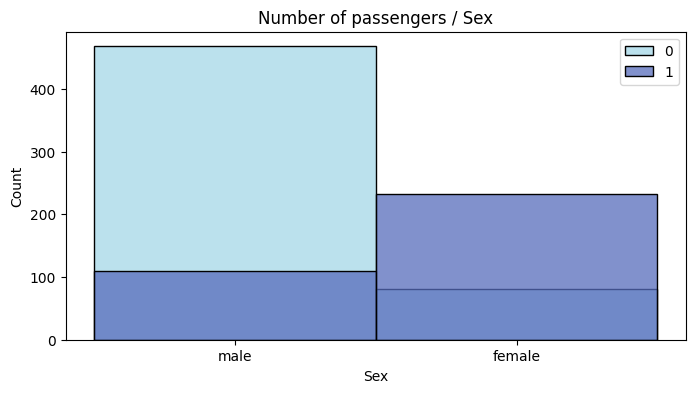

In [54]:
# Plot distribution pairs for "Sex" and hue as "Survived"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, h in enumerate(train_df["Survived"].unique()):
    g = sns.histplot(train_df.loc[train_df["Survived"]==h, "Sex"], 
                                  color=color_list[i], 
                                  ax=ax, 
                                  label=h)
ax.set_title("Number of passengers / Sex")
g.legend()
plt.show()

In [ ]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked


In [ ]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.

In [ ]:
# Plot distribution pairs for Age and Fare

In [ ]:
# Plot distribution pairs for Age and Fare using "Survived" as hue

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [38]:
# TODO: turn into function
def add_family_size(df, sibsp_col='SibSp', parch_col='Parch'):
    """
    Add a 'Family Size' column to the DataFrame based on the number of siblings/spouses
    and parents/children aboard, plus one for the individual.

    Parameters:
    df (pd.DataFrame): The DataFrame to add the 'Family Size' column to.
    sibsp_col (str): The name of the column representing siblings/spouses aboard. Default is 'SibSp'.
    parch_col (str): The name of the column representing parents/children aboard. Default is 'Parch'.

    Returns:
    pd.DataFrame: The original DataFrame with an added 'Family Size' column.
    """
    df["Family Size"] = df[sibsp_col] + df[parch_col] + 1
    return df

In [39]:
# TODO: turn into function
train_df["Family Size"] = train_df["SibSp"] + train_df["Parch"] + 1

In [ ]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.

## Age interval

In [42]:
# TODO: turn into function
all_df["Age Interval"] = 0.0
all_df.loc[ all_df['Age'] <= 16, 'Age Interval']  = 0
all_df.loc[(all_df['Age'] > 16) & (all_df['Age'] <= 32), 'Age Interval'] = 1
all_df.loc[(all_df['Age'] > 32) & (all_df['Age'] <= 48), 'Age Interval'] = 2
all_df.loc[(all_df['Age'] > 48) & (all_df['Age'] <= 64), 'Age Interval'] = 3
all_df.loc[ all_df['Age'] > 64, 'Age Interval'] = 4

def add_age_interval(df, age_col='Age'):
    """
    Add an 'Age Interval' column to the DataFrame, categorizing ages into intervals.

    Parameters:
    df (pd.DataFrame): The DataFrame to add the 'Age Interval' column to.
    age_col (str): The name of the column representing age. Default is 'Age'.

    Returns:
    pd.DataFrame: The original DataFrame with an added 'Age Interval' column.
    """
    # Initialize the 'Age Interval' column with default values
    df["Age Interval"] = 0.0
    
    # Apply conditions to assign age intervals
    df.loc[df[age_col] <= 16, 'Age Interval'] = 0
    df.loc[(df[age_col] > 16) & (df[age_col] <= 32), 'Age Interval'] = 1
    df.loc[(df[age_col] > 32) & (df[age_col] <= 48), 'Age Interval'] = 2
    df.loc[(df[age_col] > 48) & (df[age_col] <= 64), 'Age Interval'] = 3
    df.loc[df[age_col] > 64, 'Age Interval'] = 4

    return df


In [43]:
# TODO: turn into function
train_df["Age Interval"] = 0.0
train_df.loc[train_df['Age'] <= 16, 'Age Interval']  = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age Interval'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age Interval'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age Interval'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age Interval'] = 4

In [ ]:
all_df.head()

In [ ]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.

## Fare interval

In [53]:
# TODO: turn into function
def add_fare_interval_column(df):
    """
    Add a 'Fare Interval' column to the DataFrame based on fare ranges.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'Fare' column.

    Returns:
    pd.DataFrame: The DataFrame with the added 'Fare Interval' column.
    """
    df['Fare Interval'] = 0.0
    df.loc[df['Fare'] <= 7.91, 'Fare Interval'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare Interval'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare Interval'] = 2
    df.loc[df['Fare'] > 31, 'Fare Interval'] = 3
    return df

In [48]:
# TODO: turn into function
train_df['Fare Interval'] = 0.0
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare Interval'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare Interval'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare Interval']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare Interval'] = 3

In [ ]:
# Plot count pairs using all_df for the column "Fare Interval"

Let's create a composed feature: Pclass + Sex.

In [50]:
# TODO: turn into function
def add_sex_pclass(df, sex_col='Sex', pclass_col='Pclass'):
    """
    Add a 'Sex_Pclass' column to the DataFrame, combining the first letter of 'Sex' 
    and the 'Pclass' with a specific format.

    Parameters:
    df (pd.DataFrame): The DataFrame to add the 'Sex_Pclass' column to.
    sex_col (str): The name of the column representing sex. Default is 'Sex'.
    pclass_col (str): The name of the column representing passenger class. Default is 'Pclass'.

    Returns:
    pd.DataFrame: The original DataFrame with an added 'Sex_Pclass' column.
    """
    df["Sex_Pclass"] = df.apply(lambda row: row[sex_col][0].upper() + "_C" + str(row[pclass_col]), axis=1)
    return df

In [51]:
# TODO: turn into function
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [ ]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [58]:
# TODO: also move this function to a separate file
def parse_names(row):
    """
    Parse the 'Name' field of a DataFrame row to extract family name, title,
    given name, and maiden name.

    Parameters:
    row (pd.Series): A row of the DataFrame containing the 'Name' column.

    Returns:
    pd.Series: A Series containing family name, title, given name, and maiden name.
    """
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0].strip()
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").strip()
        next_text = split_text[1].strip()

        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0].strip()
            maiden_name = split_text[1].rstrip(")").strip()
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")
        return pd.Series([None, None, None, None])
    
    

In [59]:
# TODO: turn into function

def extract_names(df):
    """
    Extract family name, title, given name, and maiden name from the 'Name' column 
    and add them as new columns to the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'Name' column.

    Returns:
    pd.DataFrame: The original DataFrame with new columns added for Family Name, Title, 
                  Given Name, and Maiden Name.
    """
    # Apply the parse_names function to extract name components
    df[["Family Name", "Title", "Given Name", "Maiden Name"]] = df.apply(lambda row: parse_names(row), axis=1)
    return df

In [60]:
# TODO: turn into function
train_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = train_df.apply(lambda row: parse_names(row), axis=1)

## Multivariate analysis


Let's look now to the interaction of multiple features.

In [ ]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
def plot_age_interval_by_pclass(df):
    """
    Plot count of 'Age Interval' grouped by 'Pclass'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'Age Interval' and 'Pclass' columns.
    """
    # Group by 'Pclass' and 'Age Interval' and count occurrences
    count_data = df.groupby(['Pclass', 'Age Interval']).size().reset_index(name='Count')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', y='Count', hue='Age Interval', data=count_data, palette='viridis')
    
    # Adding title and labels
    plt.title('Count of Age Intervals by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.legend(title='Age Interval')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"


In [ ]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"

def plot_pclass_by_fare_interval(df):
    """
    Plot count of 'Pclass' grouped by 'Fare Interval'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'Pclass' and 'Fare Interval' columns.
    """
    # Group by 'Fare Interval' and 'Pclass' and count occurrences
    count_data = df.groupby(['Fare Interval', 'Pclass']).size().reset_index(name='Count')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Fare Interval', y='Count', hue='Pclass', data=count_data, palette='viridis')
    
    # Adding title and labels
    plt.title('Count of Passenger Class by Fare Interval')
    plt.xlabel('Fare Interval')
    plt.ylabel('Count')
    plt.legend(title='Pclass')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [91]:
# TODO: turn into function
def add_family_type_column(datasets):
    """
    Add a 'Family Type' column based on 'Family Size' to the provided datasets.

    Parameters:
    datasets (list of pd.DataFrame): List containing DataFrames to which the 'Family Type' column will be added.
    """
    for dataset in datasets:
        # Check if 'Family Size' exists in the dataset
        if "Family Size" in dataset.columns:
            dataset["Family Type"] = dataset["Family Size"]
        else:
            print(f"'Family Size' column not found in dataset with shape {dataset.shape}.")

In [92]:
# TODO: turn into function
def assign_family_type(datasets):
    """
    Assign a 'Family Type' based on 'Family Size' for the provided datasets.

    Parameters:
    datasets (list of pd.DataFrame): List containing DataFrames to which the 'Family Type' will be assigned.
    """
    for dataset in datasets:
        # Assign 'Family Type' based on 'Family Size'
        dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
        dataset.loc[(dataset["Family Size"] > 1) & (dataset["Family Size"] < 5), "Family Type"] = "Small"
        dataset.loc[dataset["Family Size"] >= 5, "Family Type"] = "Large"

In [93]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [94]:
# TODO: turn into function
def unify_titles(datasets):
    """
    Standardize titles in the 'Titles' column for the provided datasets.

    Parameters:
    datasets (list of pd.DataFrame): List containing DataFrames to which the title unification will be applied.
    """
    for dataset in datasets:
        # Unify 'Miss'
        dataset['Titles'] = dataset['Titles'].replace({'Mlle.': 'Miss.', 'Ms.': 'Miss.'})
        # Unify 'Mrs'
        dataset['Titles'] = dataset['Titles'].replace({'Mme.': 'Mrs.'})
        # Unify Rare titles
        rare_titles = ['Lady.', 'the Countess.', 'Capt.', 'Col.', 'Don.', 
                       'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.']
        dataset['Titles'] = dataset['Titles'].replace(rare_titles, 'Rare')

In [ ]:
# TODO: turn into function
def calculate_survival_rate_by_title_and_sex(dataset):
    """
    Calculate the mean survival rate grouped by 'Titles' and 'Sex'.

    Parameters:
    dataset (pd.DataFrame): The DataFrame containing the relevant columns.

    Returns:
    pd.DataFrame: A DataFrame with the mean survival rates grouped by 'Titles' and 'Sex'.
    """
    return dataset[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

# Baseline model

## Feature engineering: Map categorical value to numerical values

In [98]:
# TODO: turn into function
def map_sex_column(datasets):
    """
    Maps the 'Sex' column to integers, where 'female' is 1 and 'male' is 0.

    Parameters:
    datasets (list of pd.DataFrame): List of DataFrames to apply the transformation.

    Returns:
    None: The function modifies the DataFrames in place.
    """
    for dataset in datasets:
        dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

Create train-validation split.

In [99]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [100]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [101]:
# TODO: turn into function
prepare_datasets(train, valid, predictors, target):
    """
    Prepares the training and validation datasets by extracting the feature columns (predictors) and the target column.

    Parameters:
    train (pd.DataFrame): The training dataset.
    valid (pd.DataFrame): The validation dataset.
    predictors (list of str): List of column names to be used as predictors/features.
    target (str): The column name of the target variable.

    Returns:
    tuple: Returns four datasets: train_X, train_Y, valid_X, valid_Y.
    """
    # Extract feature columns and target columns for training
    train_X = train[predictors]
    train_Y = train[target].values

    # Extract feature columns and target columns for validation
    valid_X = valid[predictors]
    valid_Y = valid[target].values

    return train_X, train_Y, valid_X, valid_Y

Initialize the classifiction algorithm.

In [102]:
# TODO: could this and the following code cells be turned into a function that returns the prediction?


def train_and_predict_random_forest(train_X, train_Y, valid_X, random_state=42, n_estimators=100, criterion="gini"):
    """
    Trains a RandomForestClassifier on the training data and returns predictions for both training and validation sets.

    Parameters:
    train_X (pd.DataFrame): Features of the training dataset.
    train_Y (pd.Series or np.array): Target of the training dataset.
    valid_X (pd.DataFrame): Features of the validation dataset.
    random_state (int, optional): Random state for reproducibility. Default is 42.
    n_estimators (int, optional): The number of trees in the forest. Default is 100.
    criterion (str, optional): The function to measure the quality of a split. Default is "gini".

    Returns:
    tuple: Returns predictions for both training and validation sets.
    """
    # Initialize the RandomForestClassifier
    clf = RandomForestClassifier(n_jobs=-1, 
                                 random_state=random_state,
                                 criterion=criterion,
                                 n_estimators=n_estimators,
                                 verbose=False)

    # Fit the classifier to the training data
    clf.fit(train_X, train_Y)

    # Predict on the training and validation data
    preds_train = clf.predict(train_X)
    preds_valid = clf.predict(valid_X)

    return preds_train, preds_valid

Fit the classifier with the training data.

In [ ]:
clf.fit(train_X, train_Y)

Predict the train data (to check the training classification error).

In [104]:
preds_tr = clf.predict(train_X)

Predict the validation data.

In [105]:
preds = clf.predict(valid_X)

# Evaluation

## Classification report for training data.

In [ ]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

Classification report for validation data.

In [ ]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))